This notebook is for the classification section of the book

In [78]:
#read the mnist dataset
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The following code is for extracting the inputs and outputs of the model. 

In [79]:
X, y = mnist['data'].to_numpy(), mnist['target'].astype(np.uint8)

In [80]:
X.shape, y.shape

((70000, 784), (70000,))

In [81]:
from matplotlib import pyplot as plt


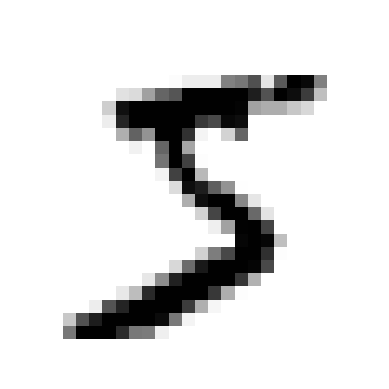

In [82]:
some_digit = X[0]
some_image = some_digit.reshape(28,28)
plt.imshow(some_image, cmap = 'binary')
plt.axis('off')
plt.show()

Now we have to split the dataset into training and testing parts. The first 60000 images are used for training, while the last 10000 are used for testing.
The training data is already shuffled, so we don't need to do that.

In [83]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Before we try to do full classification, we will experiment with building a classifier that distinguishes between the digit 5 and all other digits.

In [84]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Now we build the SGD classifier, which uses a linear SVM

In [85]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [86]:
sgd_clf.predict([some_digit])

array([ True])

Check the model's performance using cross validation and stratified cross validation

In [87]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import clone

In [88]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [89]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_index]
    X_test_fold = X_train[test_index]
    y_train_fold = y_train_5[train_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


Now we use the confusion matrix as a better preformance measure

In [90]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [91]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [92]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Precision is equal to: TP/(TP+FP)
In other words, the precision is equal to how many true positives there are, divided by the total number of positives in the dataset.

Recall is equal to: TP/(TP+FN)
In other wortds, it measures the fraction of the instances that are correctly detected by the classifier.

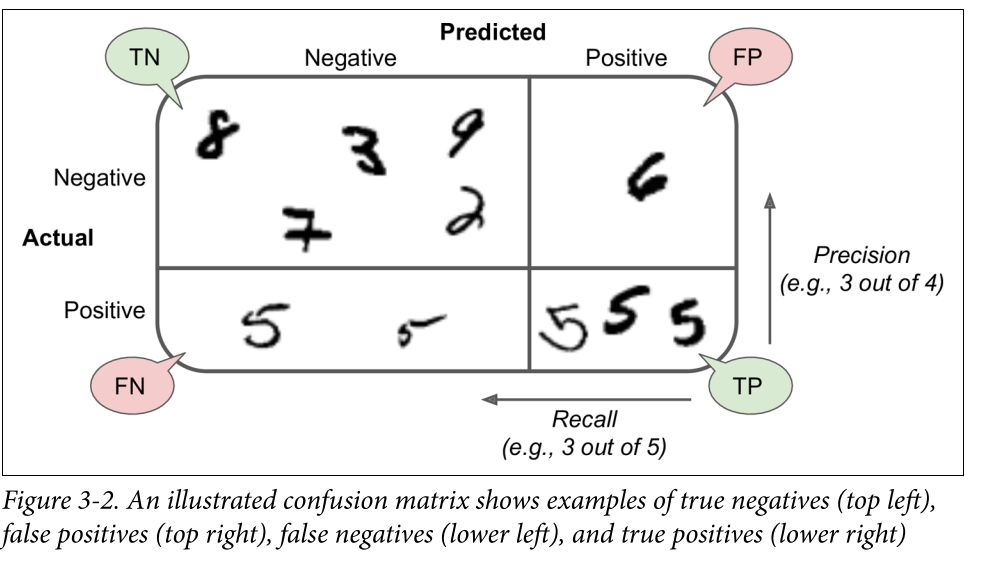

In [93]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [94]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

The results above can be interpreted as follows:
1. When the model claims that the input is a 5, it is correct 83.708% of the time. (This is the precision of the model)
2. The model detects only 65.11% of the 5's. (This is the recall of the model)

You can combine both the precision and recall into a single measure that is called the F1 score. It can be calculated as follows:

F1 = 2 * (precision * recall) / (precision + recall)

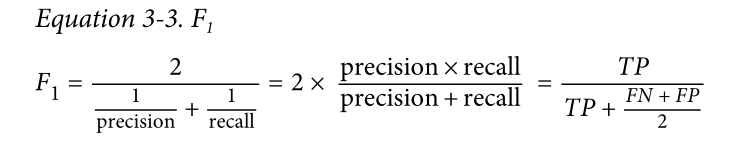

In [95]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847